

---


The following code is a Machine Learning grinding example, based on the dataset "Condition monitoring of hydraulic systems".


---




> The data set was experimentally obtained with a hydraulic test rig. This test rig consists of a primary working and a secondary cooling-filtration circuit which are connected via the oil tank (1), (2). The system cyclically repeats constant load cycles (duration 60 seconds) and measures process values such as pressures, volume flows and temperatures while the condition of four hydraulic components (cooler, valve, pump and accumulator) is quantitatively varied.


---


More information about the dataset, can be found in the following [link](https://archive.ics.uci.edu/ml/datasets/Condition+monitoring+of+hydraulic+systems).


---





We are going to import requests in order to get the dataset, and because the files are in zip format w will also import ZipFile and BytesIO in order to unzip the file on the fly.

In [1]:
from io import BytesIO
from zipfile import ZipFile
import requests

Import pandas and matplot for data manipulation and visualizations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

All the necessary imports for the Machine Learning models that we are going to use for predicting a failure.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV

At last, import pickle so we can serialize the final models to files for future use.

In [4]:
import pickle

Send a get request, in order to bring the data.zip file.

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00447/data.zip'

resp = requests.get(url)

Pass the content of the responce to the ZipFile instance

In [6]:
zipfile = ZipFile(BytesIO(resp.content))

In [7]:
zipfile

<zipfile.ZipFile file=<_io.BytesIO object at 0x7f5a58bca5f0> mode='r'>

Get all the names of the files in data.zip an print them

In [8]:
file_names_lst = zipfile.namelist()
print(file_names_lst)

['CE.txt', 'CP.txt', 'description.txt', 'EPS1.txt', 'FS1.txt', 'FS2.txt', 'profile.txt', 'PS1.txt', 'PS2.txt', 'PS3.txt', 'PS4.txt', 'PS5.txt', 'PS6.txt', 'SE.txt', 'TS1.txt', 'TS2.txt', 'TS3.txt', 'TS4.txt', 'VS1.txt', 'documentation.txt']


Create a pandas dataframe for each file and pass all the values from each file.
CSV files are tab separated in this example.

In [9]:
coolingE1 = pd.read_csv(zipfile.open(file_names_lst[0]), sep='\t', header=None)
coolingP1 = pd.read_csv(zipfile.open(file_names_lst[1]), sep='\t', header=None)
pump1 = pd.read_csv(zipfile.open(file_names_lst[3]), sep='\t', header=None)

volumeFlow1 = pd.read_csv(zipfile.open(file_names_lst[4]), sep='\t', header=None)
volumeFlow2 = pd.read_csv(zipfile.open(file_names_lst[5]), sep='\t', header=None)

profile = pd.read_csv(zipfile.open(file_names_lst[6]), sep='\t', header=None)

pressureFile1 = pd.read_csv(zipfile.open(file_names_lst[7]), sep='\t', header=None)
pressureFile2 = pd.read_csv(zipfile.open(file_names_lst[8]), sep='\t', header=None)
pressureFile3 = pd.read_csv(zipfile.open(file_names_lst[9]), sep='\t', header=None)
pressureFile4 = pd.read_csv(zipfile.open(file_names_lst[10]), sep='\t', header=None)
pressureFile5 = pd.read_csv(zipfile.open(file_names_lst[11]), sep='\t', header=None)
pressureFile6 = pd.read_csv(zipfile.open(file_names_lst[12]), sep='\t', header=None)

effFactor1 = pd.read_csv(zipfile.open(file_names_lst[13]), sep='\t', header=None)

temperature1 = pd.read_csv(zipfile.open(file_names_lst[14]), sep='\t', header=None)
temperature2 = pd.read_csv(zipfile.open(file_names_lst[15]), sep='\t', header=None)
temperature3 = pd.read_csv(zipfile.open(file_names_lst[16]), sep='\t', header=None)
temperature4 = pd.read_csv(zipfile.open(file_names_lst[17]), sep='\t', header=None)

vibration1 = pd.read_csv(zipfile.open(file_names_lst[18]), sep='\t', header=None)

Lets see the shape for each data frame

In [10]:
print(f'pressureFile1 shape: {pressureFile1.shape}')
print(f'pressureFile2 shape: {pressureFile2.shape}')
print(f'pressureFile3 shape: {pressureFile3.shape}')
print(f'pressureFile4 shape: {pressureFile4.shape}')
print(f'pressureFile4 shape: {pressureFile5.shape}')
print(f'pressureFile4 shape: {pressureFile6.shape}')

print(f'temperature1 shape: {temperature1.shape}')
print(f'temperature2 shape: {temperature2.shape}')
print(f'temperature3 shape: {temperature3.shape}')
print(f'temperature4 shape: {temperature4.shape}')

print(f'volumeFlow1 shape: {volumeFlow1.shape}')
print(f'volumeFlow2 shape: {volumeFlow2.shape}')

print(f'coolingE1 shape: {coolingE1.shape}')
print(f'coolingP1 shape: {coolingP1.shape}')

print(f'pump1 shape: {pump1.shape}')

print(f'effFactor1 shape: {effFactor1.shape}')

print(f'vibration1 shape: {vibration1.shape}')

print(f'profile shape: {profile.shape}')

pressureFile1 shape: (2205, 6000)
pressureFile2 shape: (2205, 6000)
pressureFile3 shape: (2205, 6000)
pressureFile4 shape: (2205, 6000)
pressureFile4 shape: (2205, 6000)
pressureFile4 shape: (2205, 6000)
temperature1 shape: (2205, 60)
temperature2 shape: (2205, 60)
temperature3 shape: (2205, 60)
temperature4 shape: (2205, 60)
volumeFlow1 shape: (2205, 600)
volumeFlow2 shape: (2205, 600)
coolingE1 shape: (2205, 60)
coolingP1 shape: (2205, 60)
pump1 shape: (2205, 6000)
effFactor1 shape: (2205, 60)
vibration1 shape: (2205, 60)
profile shape: (2205, 5)


According to the documentation of the data, the sensor profiles are as follows:

1. Pressure sensors (PS1 to 6): 100 Hz, 6000 attributes per sensor (6 sensors)
2. Motor power sensor (EPS1): 100 Hz, 6000 attributes per sensor (1 sensor)
3. Volume flow sensors (FS1 & 2): 10 Hz, 600 attributes per sensor (2 sensors)
4. Temperature sensors (TS1 to 4): 1 Hz, 60 attributes per sensor (4 sensors)
5. Vibration sensor (VS1): 1 Hz, 60 attributes per sensor (1 sensor)
6. Efficiency factor (SE): 1 Hz, 60 attributes per sensor (1 sensor)
7. Virtual cooling efficiency sensor (CE): 1 Hz, 60 attributes per sensor (1 sensor)
8. Virtual cooling power sensor (CP): 1 Hz, 60 attributes per sensor (1 sensor)

We can see that the sensor profiles match the shape of each data frame, so we have to convert the values for each reading.

Create a function that takes a dataframe as attribute and returns the mean conversion of each reading.

In [11]:
#average the cycle data

def mean_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.mean(axis = 1)
    return df1

Using the above function to convert each dataframe.

In [12]:
PS1 = mean_conversion(pressureFile1)
PS2 = mean_conversion(pressureFile2)
PS3 = mean_conversion(pressureFile3)
PS4 = mean_conversion(pressureFile4)
PS5 = mean_conversion(pressureFile5)
PS6 = mean_conversion(pressureFile6)
FS1 = mean_conversion(volumeFlow1)
FS2 = mean_conversion(volumeFlow2)
TS1 = mean_conversion(temperature1)
TS2 = mean_conversion(temperature2)
TS3 = mean_conversion(temperature3)
TS4 = mean_conversion(temperature4)
P1 = mean_conversion(pump1)
VS1 = mean_conversion(vibration1)
CE1 = mean_conversion(coolingE1)
CP1 = mean_conversion(coolingP1)
SE1 = mean_conversion(effFactor1)

Create a new data frame with the converted dataframes from above and set the name for each column.

In [13]:
df = pd.concat([PS1, PS2, PS3, PS4, PS5, PS6, FS1, FS2, TS1, TS2, TS3, TS4, P1, VS1, CE1, CP1, SE1], axis=1)
df.set_axis(['PS1','PS2','PS3','PS4','PS5','PS6','FS1','FS2','TS1','TS2','TS3','TS4','EPS1','VS1','CE1','CP1','SE1'], axis= 1, inplace=True)

In [14]:
df.shape

(2205, 17)

lets see a discription for our dataframe.

In [15]:
df.describe()

,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,EPS1,VS1,CE1,CP1,SE1
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,6.198549,9.649453,45.424567,50.365979,47.662121,40.735654,2495.509203,0.613315,31.299077,1.808399,55.287900
std,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,1.032883,0.449246,7.991933,7.396254,7.451888,8.107878,73.836682,0.060260,11.575330,0.278263,8.960189
min,155.391547,104.406307,0.840252,0.000000,8.365800,8.321527,2.018572,8.857513,35.313783,40.859400,38.245733,30.390800,2361.747267,0.524367,17.555983,1.062150,18.276617
25%,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,6.391670,9.203397,36.237150,41.864183,39.123183,31.272567,2442.933467,0.555100,20.084650,1.550100,56.270183
50%,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,6.576673,9.692270,44.836650,49.780583,47.070250,40.429050,2480.926633,0.610183,27.392533,1.739683,58.758150
75%,161.000735,109.421612,1.932047,3.503266,9.844351,9.729275,6.657508,10.155008,54.104317,58.584467,55.694433,49.409500,2548.211467,0.649850,46.677383,2.148483,59.656900
max,180.922708,131.589089,2.023398,10.207068,9.978510,9.856591,6.722707,10.403098,57.899283,61.958467,59.423167,53.060417,2740.641000,0.839067,47.903667,2.840100,60.755300


Because the mean value for each column has a high deviation from each other, something that will have a negative impact for our models, we are going to scale our values with a standard scaler.

Set the names in the profile dataframe, according to documentation. This dataframe is going to be the flags for our models.

In [16]:
profile.set_axis(['Cooler Condition', 'Valve Condition', 'Internal pump leakage', 'Hydraulic Accumulator', 'Flag_status'], axis=1, inplace=True)

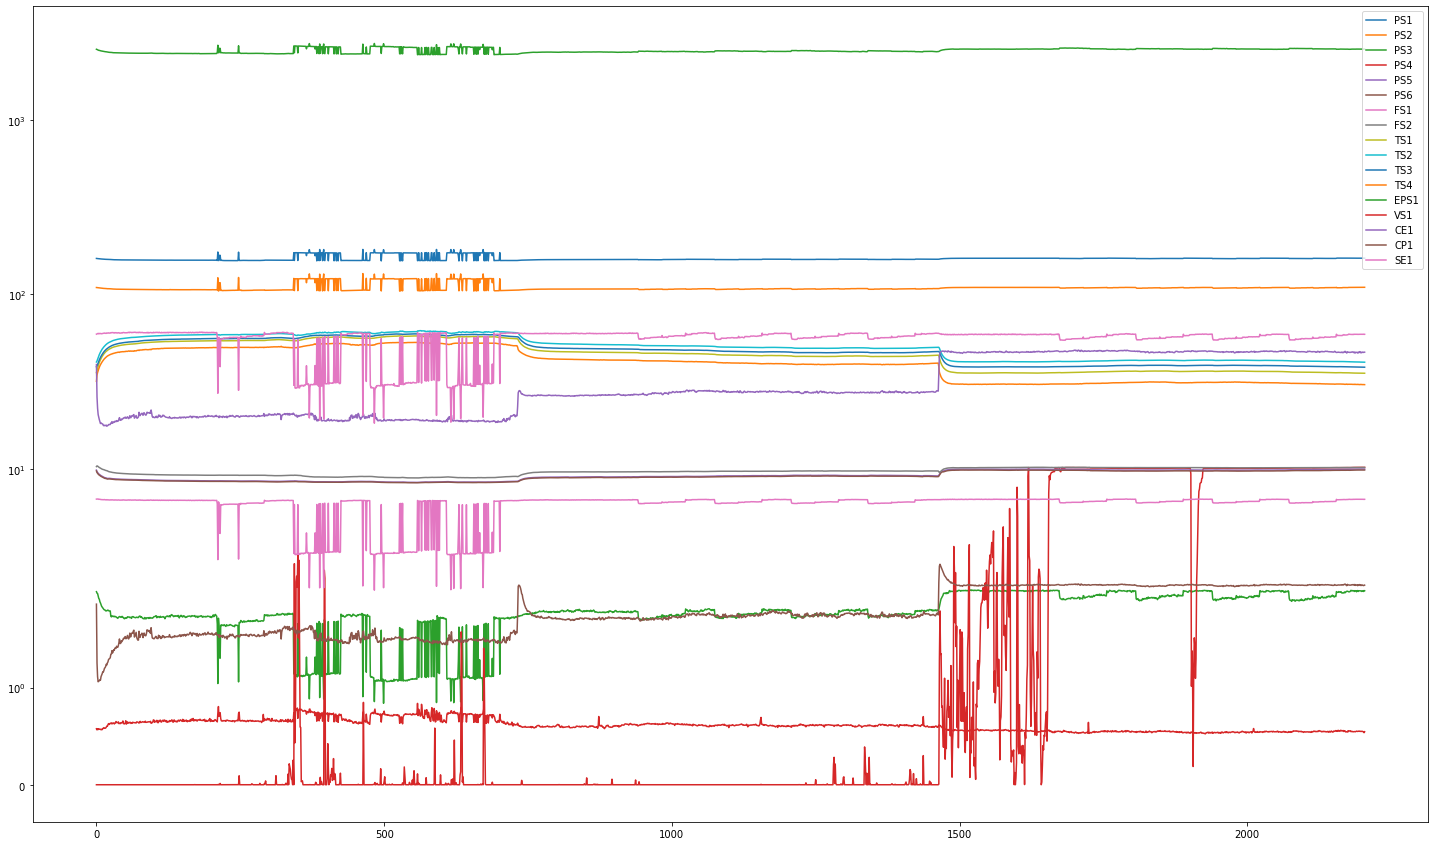

In [17]:
plt.figure(figsize=(25,15))
plt.plot(df)
plt.yscale('symlog')
plt.legend(df.columns)
plt.show()

Make a data split for training and testing data.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df, profile, test_size=0.2, random_state=25)

Prepare the training flags for each model and the test flags respectively.

In [19]:
y_cooler_train = y_train['Cooler Condition']
y_valve_train = y_train['Valve Condition']
y_leak_train = y_train['Internal pump leakage']
y_accumulator_train = y_train['Hydraulic Accumulator']

In [20]:
y_cooler_test = y_test['Cooler Condition']
y_valve_test = y_test['Valve Condition']
y_leak_test = y_test['Internal pump leakage']
y_accumulator_test = y_test['Hydraulic Accumulator']

Instantiate a random forest classifier and a standard scaler, create a pipe line and train our models.

In [21]:
cooler_scaler = StandardScaler()
cooler_model = RandomForestClassifier(class_weight='balanced')
pipe_cooler = Pipeline([('scaler', cooler_scaler), ('model', cooler_model)])
pipe_cooler.fit(x_train,y_cooler_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [22]:
valve_scaler = StandardScaler()
valve_model = RandomForestClassifier(class_weight='balanced')
pipe_valve = Pipeline([('scaler', valve_scaler), ('model', valve_model)])
pipe_valve.fit(x_train,y_valve_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [23]:
leak_scaler = StandardScaler()
leak_model = RandomForestClassifier(class_weight='balanced')
pipe_leak = Pipeline([('scaler', leak_scaler), ('model', leak_model)])
pipe_leak.fit(x_train,y_leak_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [24]:
accumulator_scaler = StandardScaler()
accumulator_model = RandomForestClassifier(class_weight='balanced')
pipe_accumulator = Pipeline([('scaler', accumulator_scaler), ('model', accumulator_model)])
pipe_accumulator.fit(x_train, y_accumulator_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(class_weight='balanced'))])

Lets see how our models can understand and predict correctly the outputs for each circumstance. The metrics that we will focus is recall average score, since we care not to misclassify a probable failure as a non failure.

In [25]:
pred_cooler = pipe_cooler.predict(x_test)
print(classification_report(y_cooler_test, pred_cooler))
cooler_recall = recall_score(y_cooler_test, pred_cooler, average='weighted')

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       155
          20       1.00      0.99      1.00       132
         100       1.00      1.00      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



In [26]:
pred_valve = pipe_valve.predict(x_test)
print(classification_report(y_valve_test, pred_valve))
valve_recall = recall_score(y_valve_test, pred_valve, average='weighted')

              precision    recall  f1-score   support

          73       0.96      0.95      0.95        78
          80       0.89      0.97      0.93        64
          90       0.99      0.96      0.97        69
         100       0.99      0.98      0.98       230

    accuracy                           0.97       441
   macro avg       0.96      0.96      0.96       441
weighted avg       0.97      0.97      0.97       441



In [27]:
pred_leak = pipe_leak.predict(x_test)
print(classification_report(y_leak_test, pred_leak))
leak_recall = recall_score(y_leak_test, pred_leak, average='weighted')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       241
           1       0.98      0.99      0.98        98
           2       0.98      1.00      0.99       102

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441



In [28]:
pred_accumulator = pipe_accumulator.predict(x_test)
print(classification_report(y_accumulator_test, pred_accumulator))
accumulator_recall = recall_score(y_accumulator_test, pred_accumulator, average='weighted')

              precision    recall  f1-score   support

          90       1.00      0.98      0.99       161
         100       0.95      0.95      0.95        73
         115       0.94      0.98      0.96       100
         130       0.99      0.98      0.99       107

    accuracy                           0.98       441
   macro avg       0.97      0.97      0.97       441
weighted avg       0.98      0.98      0.98       441



We are getting realy good results for each model! average recall for all is more than 98%. Lets see if we can get it higher than that!

In [29]:
recall_average = (cooler_recall + valve_recall + leak_recall + accumulator_recall) / 4
print('total recall average : {}%'.format(recall_average))

total recall average : 0.9829931972789115%


In [30]:
scores_df = pd.DataFrame([cooler_recall, valve_recall, leak_recall, accumulator_recall, recall_average]).T

In [31]:
scores_df.set_axis(['cooler_recall', 'valve_recall', 'leak_recall', 'accumulator_recall', 'recall_average'], axis=1, inplace=True)

In [32]:
scores_df.set_axis(['run_1'], inplace=True)

Lets which features are more important for each model and see if we can make it better by feature elimination.

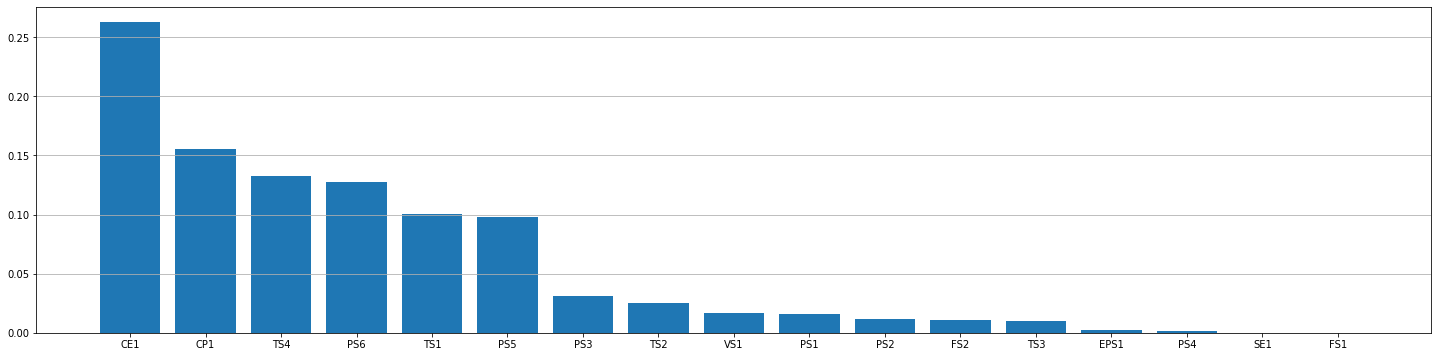

In [33]:
important = pipe_cooler.steps[1][1].feature_importances_

important = pd.DataFrame(zip(important, x_train.columns))

important.sort_values(0, ascending=False, inplace=True)

plt.figure(figsize=(25,6))
plt.bar(x=important[1], height=important[0])
plt.grid(axis='y')
plt.show()

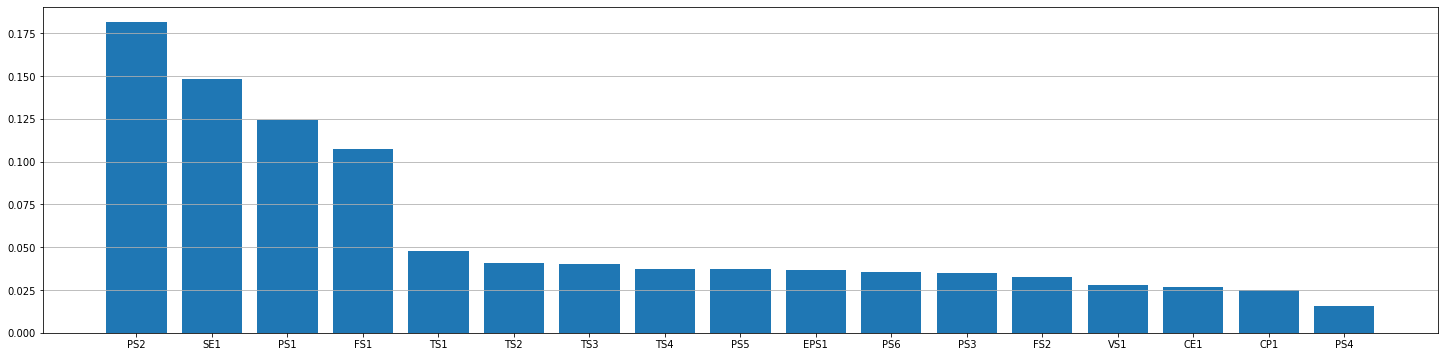

In [34]:
important = pipe_valve.steps[1][1].feature_importances_

important = pd.DataFrame(zip(important, x_train.columns))

important.sort_values(0, ascending=False, inplace=True)

plt.figure(figsize=(25,6))
plt.bar(x=important[1], height=important[0])
plt.grid(axis='y')
plt.show()

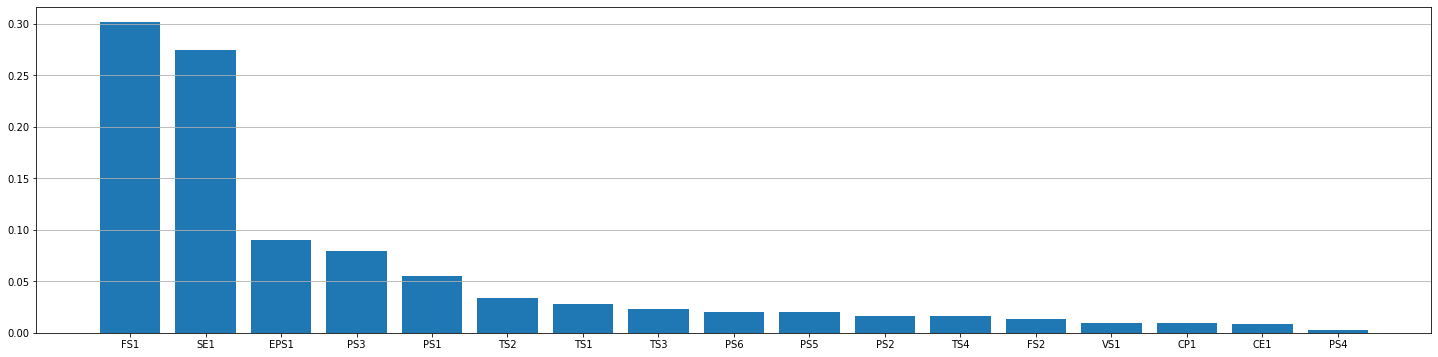

In [35]:
important = pipe_leak.steps[1][1].feature_importances_

important = pd.DataFrame(zip(important, x_train.columns))

important.sort_values(0, ascending=False, inplace=True)

plt.figure(figsize=(25,6))
plt.bar(x=important[1], height=important[0])
plt.grid(axis='y')
plt.show()

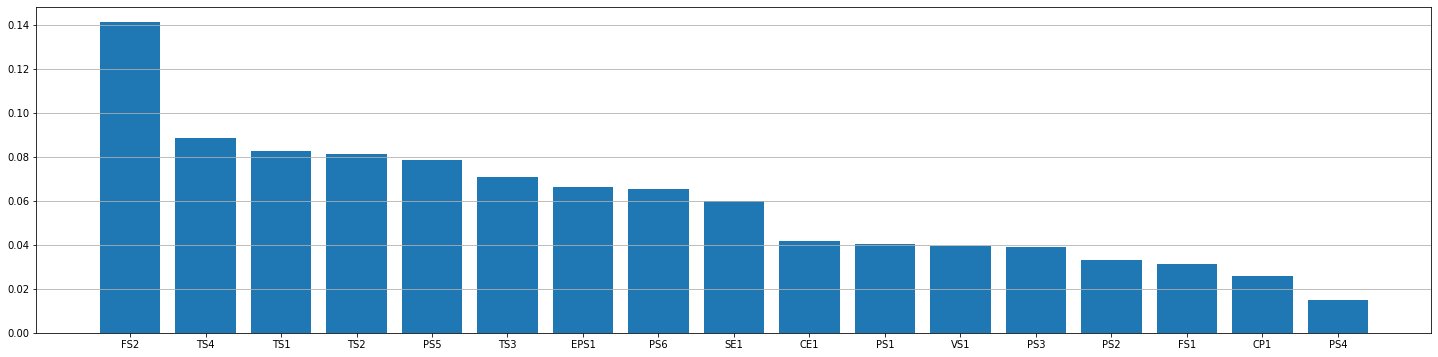

In [36]:
important = pipe_accumulator.steps[1][1].feature_importances_

important = pd.DataFrame(zip(important, x_train.columns))

important.sort_values(0, ascending=False, inplace=True)

plt.figure(figsize=(25,6))
plt.bar(x=important[1], height=important[0])
plt.grid(axis='y')
plt.show()

Lets try and retrain the models keeping only the top 5 features, that are more important for each model. First we have to re-instantiate the models and the pipelines. During training we are going to pass the data, with the top 5 features.

In [37]:
cooler_scaler = StandardScaler()
cooler_model = RandomForestClassifier(class_weight='balanced')
pipe_cooler = Pipeline([('scaler', cooler_scaler), ('model', cooler_model)])

pipe_cooler.fit(x_train[['CP1', 'CE1', 'TS4', 'PS5', 'PS6']],y_cooler_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [38]:
valve_scaler = StandardScaler()
valve_model = RandomForestClassifier(class_weight='balanced')
pipe_valve = Pipeline([('scaler', valve_scaler), ('model', valve_model)])

pipe_valve.fit(x_train[['PS2', 'SE1', 'PS1', 'FS1', 'TS1']],y_valve_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [39]:
leak_scaler = StandardScaler()
leak_model = RandomForestClassifier(class_weight='balanced')
pipe_leak = Pipeline([('scaler', leak_scaler), ('model', leak_model)])

pipe_leak.fit(x_train[['SE1', 'FS1', 'EPS1', 'PS3', 'PS1']],y_leak_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [40]:
accumulator_scaler = StandardScaler()
accumulator_model = RandomForestClassifier(class_weight='balanced')
pipe_accumulator = Pipeline([('scaler', accumulator_scaler), ('model', accumulator_model)])

pipe_accumulator.fit(x_train[['FS2', 'TS4', 'TS3', 'TS1', 'EPS1']], y_accumulator_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(class_weight='balanced'))])

Lets see if we have any differences in score.

In [41]:
pred_cooler = pipe_cooler.predict(x_test[['CP1', 'CE1', 'TS4', 'PS5', 'PS6']])
print(classification_report(y_cooler_test, pred_cooler))
cooler_recall = recall_score(y_cooler_test, pred_cooler, average='weighted')

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       155
          20       1.00      0.99      1.00       132
         100       1.00      1.00      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



In [42]:
pred_valve = pipe_valve.predict(x_test[['PS2', 'SE1', 'PS1', 'FS1', 'TS1']])
print(classification_report(y_valve_test, pred_valve))
valve_recall = recall_score(y_valve_test, pred_valve, average='weighted')

              precision    recall  f1-score   support

          73       0.97      0.97      0.97        78
          80       0.89      0.98      0.93        64
          90       1.00      0.94      0.97        69
         100       0.99      0.98      0.98       230

    accuracy                           0.97       441
   macro avg       0.96      0.97      0.97       441
weighted avg       0.97      0.97      0.97       441



In [43]:
pred_leak = pipe_leak.predict(x_test[['SE1', 'FS1', 'EPS1', 'PS3', 'PS1']])
print(classification_report(y_leak_test, pred_leak))
leak_recall = recall_score(y_leak_test, pred_leak, average='weighted')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      0.99      0.99        98
           2       0.99      1.00      1.00       102

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



In [44]:
pred_accumulator = pipe_accumulator.predict(x_test[['FS2', 'TS4', 'TS3', 'TS1', 'EPS1']])
print(classification_report(y_accumulator_test, pred_accumulator))
accumulator_recall = recall_score(y_accumulator_test, pred_accumulator, average='weighted')

              precision    recall  f1-score   support

          90       0.99      0.99      0.99       161
         100       0.96      0.89      0.92        73
         115       0.92      0.95      0.94       100
         130       0.96      0.98      0.97       107

    accuracy                           0.96       441
   macro avg       0.96      0.95      0.95       441
weighted avg       0.96      0.96      0.96       441



Lets see an average recall for all models.

In [45]:
recall_average = (cooler_recall + valve_recall + leak_recall + accumulator_recall) / 4
print('total recall average : {}%'.format(recall_average))

total recall average : 0.9824263038548753%


In [46]:
run_2 = pd.DataFrame([cooler_recall, valve_recall, leak_recall, accumulator_recall, recall_average]).T
run_2.set_axis(['cooler_recall', 'valve_recall', 'leak_recall', 'accumulator_recall', 'recall_average'], axis=1, inplace=True)
run_2.set_axis(['run_2'], axis=0, inplace=True)

In [47]:
scores_df = pd.concat([scores_df, run_2], axis=0)

In [48]:
scores_df

,cooler_recall,valve_recall,leak_recall,accumulator_recall,recall_average
run_1,0.997732,0.968254,0.990930,0.975057,0.982993
run_2,0.997732,0.972789,0.997732,0.961451,0.982426


We got slightly lower average this time...

Getting only the top 5 features didn't work so well, so we are going to revert changes and we will try to hyper tune the models using Grid Search cross validation. We will fold 3 times for less stress on computational speed.

In [49]:
cooler_scaler = StandardScaler()
cooler_model = RandomForestClassifier(class_weight='balanced')
pipe_cooler = Pipeline([('scaler', cooler_scaler), ('model', cooler_model)])

parameters = {
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth': [None, 2, 4, 6, 8],
    'model__n_estimators': [2, 5, 10, 15, 20, 25, 50, 100],
    'model__random_state':[None, 1, 2, 3, 4, 5, 10]
}

cv1 = GridSearchCV(pipe_cooler, param_grid=parameters, cv=3, n_jobs=-1, scoring='recall_macro', refit='recall_macro')

cv1.fit(x_train,y_cooler_train)

print('='*20)
print('Best parameters for cooler :\n')
print(cv1.best_params_)

In [50]:
valve_scaler = StandardScaler()
valve_model = RandomForestClassifier(class_weight='balanced')
pipe_valve = Pipeline([('scaler', valve_scaler), ('model', valve_model)])

parameters = {
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16],
    'model__n_estimators': [2, 5, 10, 15, 20, 25, 50, 100, 110, 120],
    'model__random_state':[None, 1, 2, 3, 4, 5, 10]
}

cv2 = GridSearchCV(pipe_cooler, param_grid=parameters, cv=3, n_jobs=-1, scoring='recall_macro', refit='recall_macro')

cv2.fit(x_train, y_valve_train)

print('='*20)
print('Best parameters for valve :\n')
print(cv2.best_params_)

In [51]:
leak_scaler = StandardScaler()
leak_model = RandomForestClassifier(class_weight='balanced')
pipe_leak = Pipeline([('scaler', leak_scaler), ('model', leak_model)])

parameters = {
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16],
    'model__n_estimators': [2, 5, 10, 15, 20, 25, 50, 100, 110, 120],
    'model__random_state':[None, 1, 2, 3, 4, 5, 10]
}

cv3 = GridSearchCV(pipe_cooler, param_grid=parameters, cv=3, n_jobs=-1, scoring='recall_macro', refit='recall_macro')

cv3.fit(x_train, y_leak_train)

print('='*20)
print('Best parameters for leakage :\n')
print(cv3.best_params_)

In [52]:
accumulator_scaler = StandardScaler()
accumulator_model = RandomForestClassifier(class_weight='balanced')
pipe_accumulator = Pipeline([('scaler', accumulator_scaler), ('model', accumulator_model)])

parameters = {
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16],
    'model__n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'model__random_state':[None, 1, 2, 3, 4, 5, 10]
}

cv4 = GridSearchCV(pipe_cooler, param_grid=parameters, cv=3, n_jobs=-1, scoring='recall_macro', refit='recall_macro')

cv4.fit(x_train, y_accumulator_train)

print('='*20)
print('Best parameters for accumulator :\n')
print(cv4.best_params_)

Lets hyper tune the models and see the results

In [53]:
cooler_scaler = StandardScaler()
cooler_model = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth= None, n_estimators= 2, random_state= 1)
pipe_cooler = Pipeline([('scaler', cooler_scaler), ('model', cooler_model)])
pipe_cooler.fit(x_train,y_cooler_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', n_estimators=2,
                                        random_state=1))])

In [54]:
valve_scaler = StandardScaler()
valve_model = RandomForestClassifier(class_weight='balanced', criterion= 'gini', max_depth= None, n_estimators= 2, random_state= 1)
pipe_valve = Pipeline([('scaler', valve_scaler), ('model', valve_model)])
pipe_valve.fit(x_train,y_valve_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', n_estimators=2,
                                        random_state=1))])

In [55]:
leak_scaler = StandardScaler()
leak_model = RandomForestClassifier(class_weight='balanced', criterion= 'entropy', max_depth= 12, n_estimators= 25, random_state= None)
pipe_leak = Pipeline([('scaler', leak_scaler), ('model', leak_model)])
pipe_leak.fit(x_train,y_leak_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=12,
                                        n_estimators=25))])

In [56]:
accumulator_scaler = StandardScaler()
accumulator_model = RandomForestClassifier(class_weight='balanced', criterion= 'entropy', max_depth= None, n_estimators= 100, random_state= 2)
pipe_accumulator = Pipeline([('scaler', accumulator_scaler), ('model', accumulator_model)])
pipe_accumulator.fit(x_train, y_accumulator_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', random_state=2))])

Lets see how our models can understand and predict correctly the outputs for each circumstance.

In [57]:
pred_cooler = pipe_cooler.predict(x_test)
print(classification_report(y_cooler_test, pred_cooler))
cooler_recall = recall_score(y_cooler_test, pred_cooler, average='weighted')

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       155
          20       1.00      0.99      1.00       132
         100       1.00      1.00      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



In [58]:
pred_valve = pipe_valve.predict(x_test)
print(classification_report(y_valve_test, pred_valve))
valve_recall = recall_score(y_valve_test, pred_valve, average='weighted')

              precision    recall  f1-score   support

          73       0.74      0.91      0.82        78
          80       0.62      0.75      0.68        64
          90       0.64      0.68      0.66        69
         100       0.98      0.83      0.90       230

    accuracy                           0.81       441
   macro avg       0.74      0.79      0.76       441
weighted avg       0.83      0.81      0.81       441



In [59]:
pred_leak = pipe_leak.predict(x_test)
print(classification_report(y_leak_test, pred_leak))
leak_recall = recall_score(y_leak_test, pred_leak, average='weighted')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      0.98      0.99        98
           2       0.97      1.00      0.99       102

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441



In [60]:
pred_accumulator = pipe_accumulator.predict(x_test)
print(classification_report(y_accumulator_test, pred_accumulator))
accumulator_recall = recall_score(y_accumulator_test, pred_accumulator, average='weighted')

              precision    recall  f1-score   support

          90       1.00      0.99      0.99       161
         100       0.96      0.97      0.97        73
         115       0.96      0.98      0.97       100
         130       0.99      0.98      0.99       107

    accuracy                           0.98       441
   macro avg       0.98      0.98      0.98       441
weighted avg       0.98      0.98      0.98       441



We are getting realy good results for each model! average recall for all is more than 98%. Lets see if we can get it higher than that!

In [61]:
recall_average = (cooler_recall + valve_recall + leak_recall + accumulator_recall) / 4
print('total recall average : {}%'.format(recall_average))

total recall average : 0.9450113378684807%


In [62]:
run_3 = pd.DataFrame([cooler_recall, valve_recall, leak_recall, accumulator_recall, recall_average]).T
run_3.set_axis(['cooler_recall', 'valve_recall', 'leak_recall', 'accumulator_recall', 'recall_average'], axis=1, inplace=True)
run_3.set_axis(['run_3'], axis=0, inplace=True)

In [63]:
scores_df = pd.concat([scores_df, run_3], axis=0)

In [64]:
scores_df

,cooler_recall,valve_recall,leak_recall,accumulator_recall,recall_average
run_1,0.997732,0.968254,0.990930,0.975057,0.982993
run_2,0.997732,0.972789,0.997732,0.961451,0.982426
run_3,0.997732,0.807256,0.993197,0.981859,0.945011


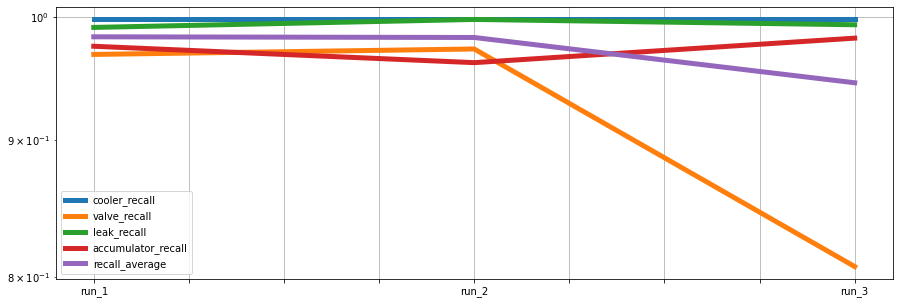

In [65]:
scores_df.plot(kind='line', stacked=False, figsize=(15,5), grid=True, sort_columns=True, linewidth=5, logy=True)

Final results, according to scores per run:
1.   For cooler model we got the same results for all three runs. Since the model in first run is the simplest one, we will use that one.
2.   For valve model, the best results were in the first 2 runs, so again, we will use the model from first model.
3.   For leak model, the best results were in the second run.
4.   For accumulator model, the best results were in the third run.

Build the final models, train them and save them with pickle for future use.

In [66]:
cooler_scaler = StandardScaler()
cooler_model = RandomForestClassifier(class_weight='balanced')
pipe_cooler = Pipeline([('scaler', cooler_scaler), ('model', cooler_model)])
pipe_cooler.fit(x_train,y_cooler_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [67]:
valve_scaler = StandardScaler()
valve_model = RandomForestClassifier(class_weight='balanced')
pipe_valve = Pipeline([('scaler', valve_scaler), ('model', valve_model)])
pipe_valve.fit(x_train,y_valve_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [68]:
leak_scaler = StandardScaler()
leak_model = RandomForestClassifier(class_weight='balanced')
pipe_leak = Pipeline([('scaler', leak_scaler), ('model', leak_model)])

pipe_leak.fit(x_train[['SE1', 'FS1', 'EPS1', 'PS3', 'PS1']],y_leak_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [69]:
accumulator_scaler = StandardScaler()
accumulator_model = RandomForestClassifier(class_weight='balanced', criterion= 'entropy', max_depth= None, n_estimators= 100, random_state= 2)
pipe_accumulator = Pipeline([('scaler', accumulator_scaler), ('model', accumulator_model)])
pipe_accumulator.fit(x_train, y_accumulator_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', random_state=2))])

In [72]:
with open('cooler_model', 'wb') as f:
  pickle.dump(pipe_cooler, f)

with open('valve_model', 'wb') as f:
  pickle.dump(pipe_valve, f)

with open('leak_model', 'wb') as f:
  pickle.dump(pipe_leak, f)

with open('accumulator_model', 'wb') as f:
  pickle.dump(pipe_accumulator, f)

Finaly we create our function that accepts a dataframe with the values as a parameter, loads the models and returns the predictions.

In [73]:
def pump_status(data_frame):
  pred_df = pd.DataFrame()

  with open('cooler_model', 'rb') as f:
    cooler = pickle.load(f)
  pred_df['cooler'] = pd.DataFrame(cooler.predict(data_frame))

  with open('valve_model', 'rb') as f:
    valve = pickle.load(f)
  pred_df['valve'] = pd.DataFrame(valve.predict(data_frame))

  with open('leak_model', 'rb') as f:
    leak = pickle.load(f)
  pred_df['leak'] = pd.DataFrame(leak.predict(data_frame[['SE1', 'FS1', 'EPS1', 'PS3', 'PS1']]))

  with open('accumulator_model', 'rb') as f:
    accumulator = pickle.load(f)
  pred_df['accumulator'] = pd.DataFrame(accumulator.predict(data_frame))

  return pred_df

In [77]:
results = pump_status(x_test)
results.head()

,cooler,valve,leak,accumulator
0,100,100,0,130
1,100,73,0,115
2,3,100,2,90
3,100,80,2,100
4,3,73,2,115


The returned data frame finaly, can be filtered for values close to total failure and raise flags (eg. linked with an API for data retrieval).